<a href="https://www.kaggle.com/code/mrsimple07/laptop-price-eda-predict?scriptVersionId=166867291" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptoppriceprediction/Laptop_price.csv


# Laptop Prices Dataset Analysis

## Introduction

In this data analysis, we explore a dataset that captures various attributes related to laptop pricing. The dataset provides valuable insights into features commonly associated with laptops, including brand, processor speed, RAM size, storage capacity, screen size, weight, and the corresponding prices.

Understanding the factors influencing laptop prices is crucial for both consumers and industry stakeholders. Analyzing this dataset allows us to uncover patterns, relationships, and trends within the data, providing valuable information for pricing strategies, market trends, and consumer preferences.

Throughout this analysis, we will load the dataset, examine summary statistics to gain an overview of the data distribution, and visualize relationships between different features and laptop prices. The goal is to derive meaningful insights that can inform decision-making processes related to laptop pricing and market dynamics.


## Loading the Data

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/laptoppriceprediction/Laptop_price.csv')

df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


# Data overview

In [3]:
df.describe

<bound method NDFrame.describe of       Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
0      Asus         3.830296        16               512    11.185147   
1      Acer         2.912833         4              1000    11.311372   
2    Lenovo         3.241627         4               256    11.853023   
3      Acer         3.806248        16               512    12.280360   
4      Acer         3.268097        32              1000    14.990877   
..      ...              ...       ...               ...          ...   
995      HP         3.343584         4              1000    12.587095   
996    Dell         2.780555         8               256    12.679356   
997    Dell         3.200569         4               512    12.666315   
998    Asus         1.604182         8               256    11.215581   
999  Lenovo         1.711980         4               256    16.561498   

       Weight         Price  
0    2.641094  17395.093065  
1    3.260012  31607.605919  

In [4]:
df.info

<bound method DataFrame.info of       Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
0      Asus         3.830296        16               512    11.185147   
1      Acer         2.912833         4              1000    11.311372   
2    Lenovo         3.241627         4               256    11.853023   
3      Acer         3.806248        16               512    12.280360   
4      Acer         3.268097        32              1000    14.990877   
..      ...              ...       ...               ...          ...   
995      HP         3.343584         4              1000    12.587095   
996    Dell         2.780555         8               256    12.679356   
997    Dell         3.200569         4               512    12.666315   
998    Asus         1.604182         8               256    11.215581   
999  Lenovo         1.711980         4               256    16.561498   

       Weight         Price  
0    2.641094  17395.093065  
1    3.260012  31607.605919  
2

Checking missing values in the dataset

In [5]:
df.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

As we can see, we don't have any missing values. So, and know we will learn data using different visualizations

# Data Visualizations

**1. Brand Distribution**

To gain insights into the distribution of laptop brands in our dataset, we start by visualizing the count of each brand. This provides an overview of the representation of different brands in our dataset.


In [6]:
brand_num = df['Brand'].value_counts()
brand_num

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

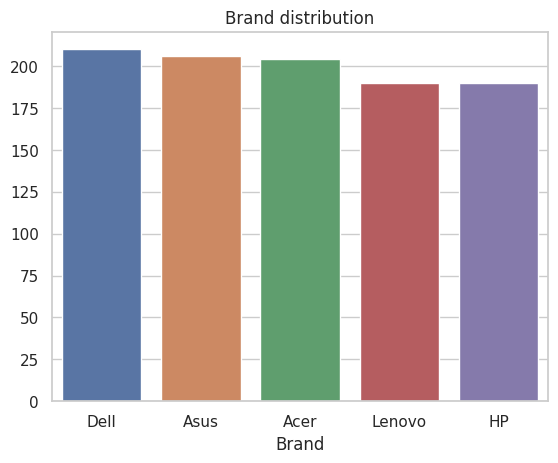

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = 'whitegrid')

sns.barplot(data = df, x= brand_num.index, y = brand_num.values, palette ='deep')
plt.title('Brand distribution')
plt.show()

**2. Correlation matrix between different features and price**

We can see the relationship between features using correlation matrix and it is really useful

In [8]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


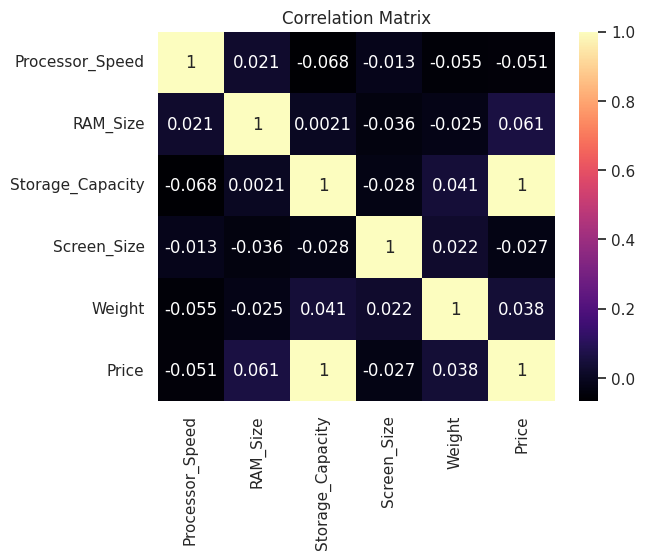

In [9]:
df_corr = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']

sns.heatmap(df[df_corr].corr(), annot = True, cmap = 'magma')
plt.title('Correlation Matrix')
plt.show()

**3. Histogram with the distribution of prices**

To gain insights into the overall distribution of laptop prices, a histogram is created to showcase the frequency of different price ranges. This visualization provides an overview of how prices are distributed across the dataset, allowing for a quick understanding of the central tendency and spread of pricing.


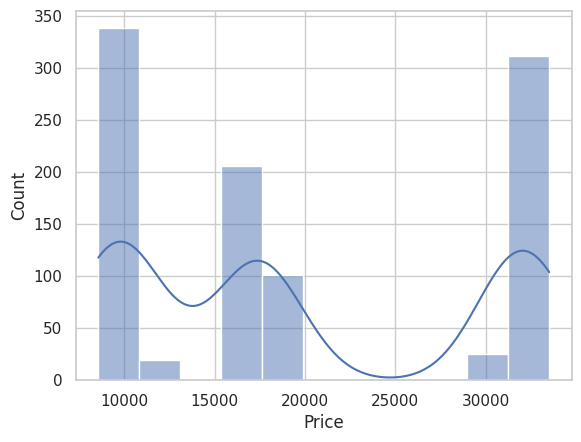

In [10]:
sns.histplot(data = df, x='Price', kde = True)
plt.show()

**4. Analysis of Laptop Prices by Brand**

In this analysis, we explore the distribution of laptop prices for different brands using histograms. Each brand is represented by a separate histogram, allowing us to observe the variations in pricing patterns across different manufacturers.


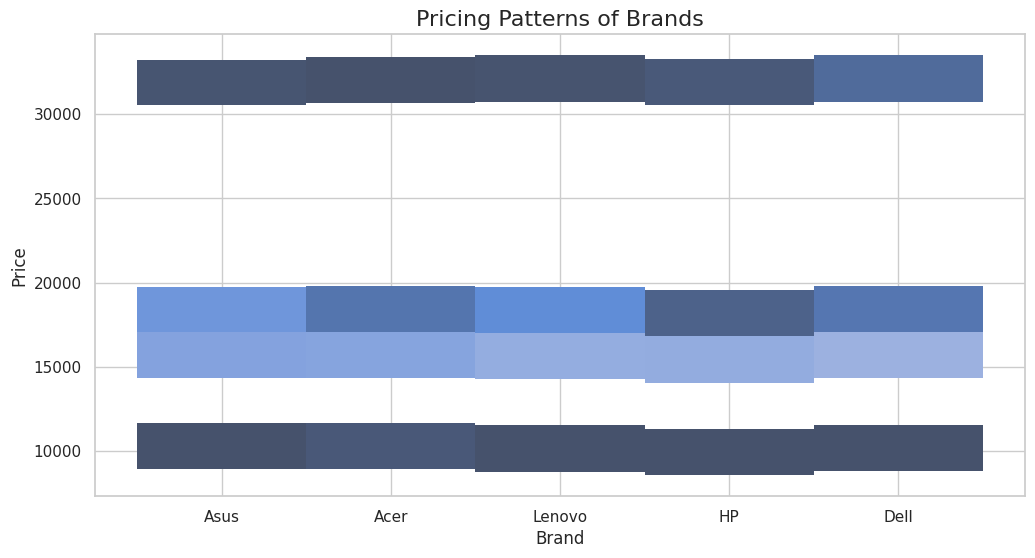

In [11]:
sns.set(style = 'whitegrid')

fig, ax = plt.subplots(figsize =(12,6))

for i, brand in enumerate(df['Brand'].unique()):
    subset_data = df[df['Brand'] ==brand]
    sns.histplot(x= 'Brand', y= 'Price', data = subset_data, ax =ax, label = brand)

ax.set_title('Pricing Patterns of Brands',  fontsize = 16)
ax.set_xlabel('Brand')
ax.set_ylabel('Price')

plt.show()

**5. Visualize relationships between multiple numerical variables using Pairplot**

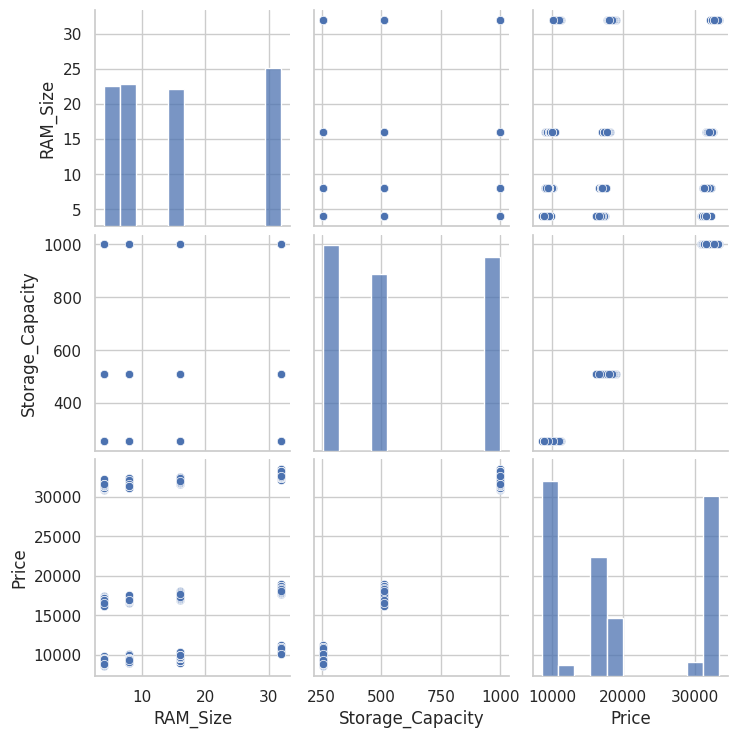

In [12]:
selected_columns = ['RAM_Size', 'Storage_Capacity', 'Price']
sns.pairplot(df[selected_columns], markers = 'o')
plt.show()

# Modeling to predict the price

For this task, we can use different models, such as Random Forest, Linear Regression, or some boosting models

**1. Random Forest Regressor**

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#one- hot encoding
df = pd.get_dummies(df)

X,y = df.drop(['Price'], axis =1), df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

model = RandomForestRegressor().fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

39493.902809005405


**2. Linear Regression**

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

print(mean_squared_error(y_test, y_pred_lin))

32304.73733598822


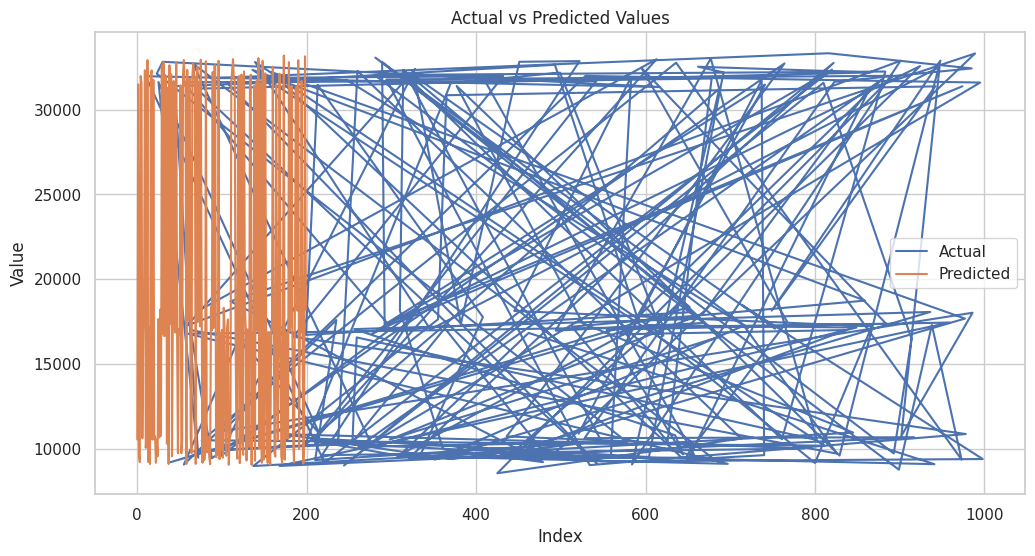

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


**3. Decision Tree**

In [16]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_dt = dt.predict(X_test)

print(mean_squared_error(y_test, y_dt))

80163.97566656923


**4. Catboost**

In [17]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE', random_seed=42)
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=100)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

0:	learn: 8473.7140040	test: 8630.4862707	best: 8630.4862707 (0)	total: 53.3ms	remaining: 53.2s
100:	learn: 169.3546303	test: 198.6584657	best: 198.5619189 (98)	total: 126ms	remaining: 1.13s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 197.157252
bestIteration = 131

Shrink model to first 132 iterations.
Mean Squared Error: 38870.9816913455


**5. LightGBM**

In [18]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor()
lgb_reg.fit(X_train, y_train)
y_pred = lgb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 42081.92512095952
